<a href="https://colab.research.google.com/github/harshysyrup/CODSOFT/blob/main/Project003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 **# TASK - 4 SALES PREDICTION USING PYTHON #** 🎯

---
Author: Harsh Surana

Batch:April

Domain:Data Science

Aim: Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.


***IMPORTING ALL THE ESSENTIAL LIBRABIES***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import seaborn as sns

***CONNECTING DATA BASE FROM GOOGLE DRIVE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/advertising.csv', encoding='latin1', sep=',', engine='python')
sales_data.columns = ['TV','Radio',	'Newspaper','Sales']
sales_data.dropna(inplace=True)
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


***HANDLING MISSING VALUES***

In [ ]:
missing_values = sales_data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


***VISUALIZATION OF DATA***

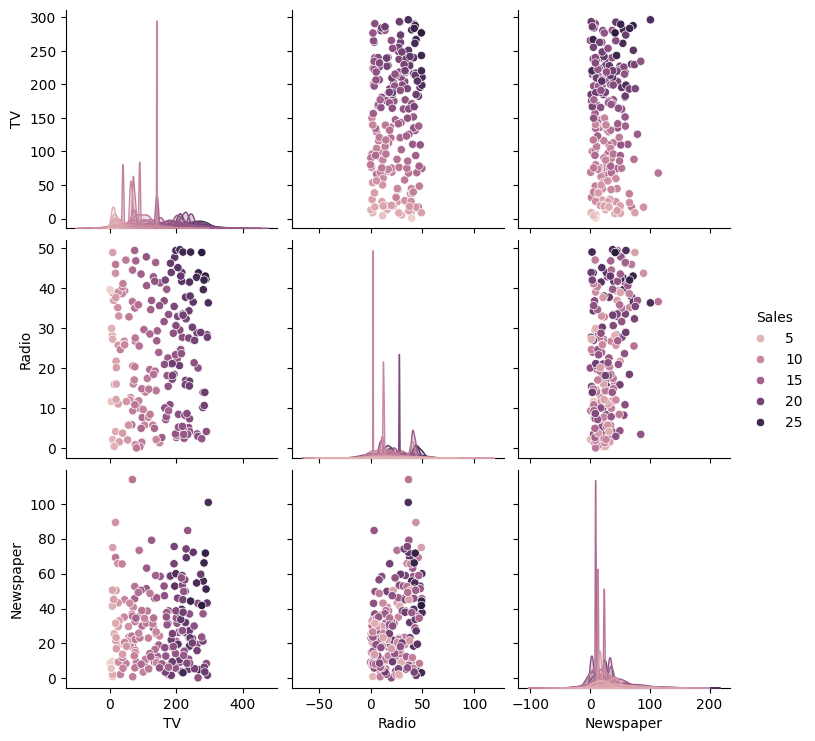

In [ ]:

sns.pairplot(sales_data, hue='Sales')
plt.show()

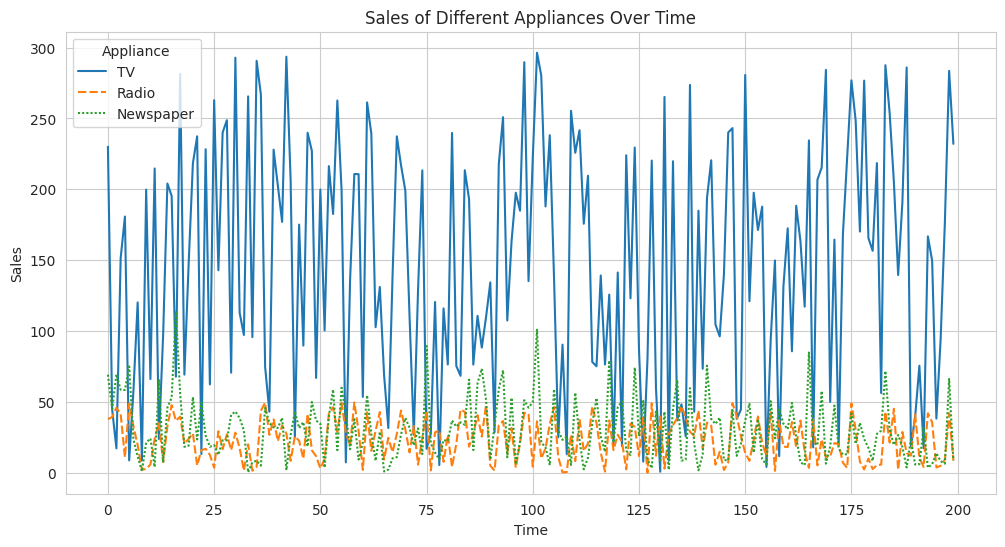

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data.drop('Sales', axis=1))
plt.title('Sales of Different Appliances Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend(title='Appliance')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(sales_data, x='TV', y='Radio', z='Newspaper', color='Sales', size='Sales', opacity=0.8)
fig.update_layout(title='Sales Data Visualization',
                  scene=dict(xaxis_title='TV', yaxis_title='Radio', zaxis_title='Newspaper'))
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=sales_data.columns[:-1], values=sales_data.mean(), hole=0.3)])

hover_template = "<b>%{label}</b><br>" + \
                 "<i>Sales: %{value}</i><br>" + \
                 "<extra></extra>"
fig.update_traces(hoverinfo='label+percent+value', hovertemplate=hover_template)

fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
x, y = np.meshgrid(x, y)
z = np.sin(x) * np.cos(y)

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

fig.update_layout(
    title='3D Surface Plot of Sin(x) * Cos(y)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

fig.show()


***Data Exploration and Feature Engineering***

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


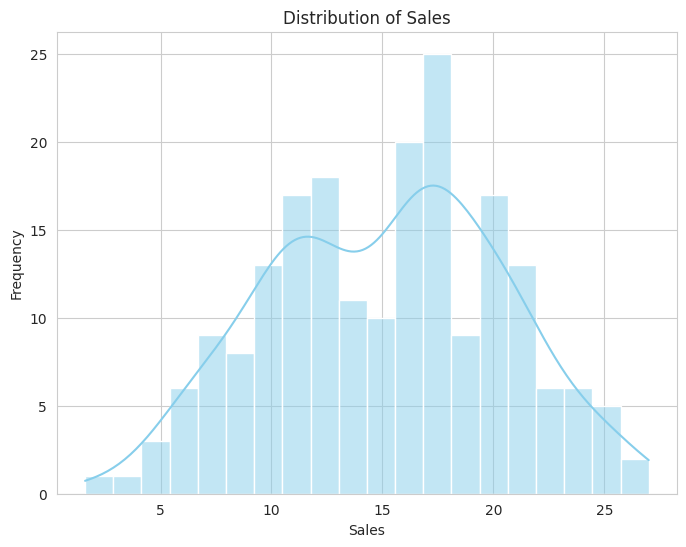

<Figure size 1200x600 with 0 Axes>

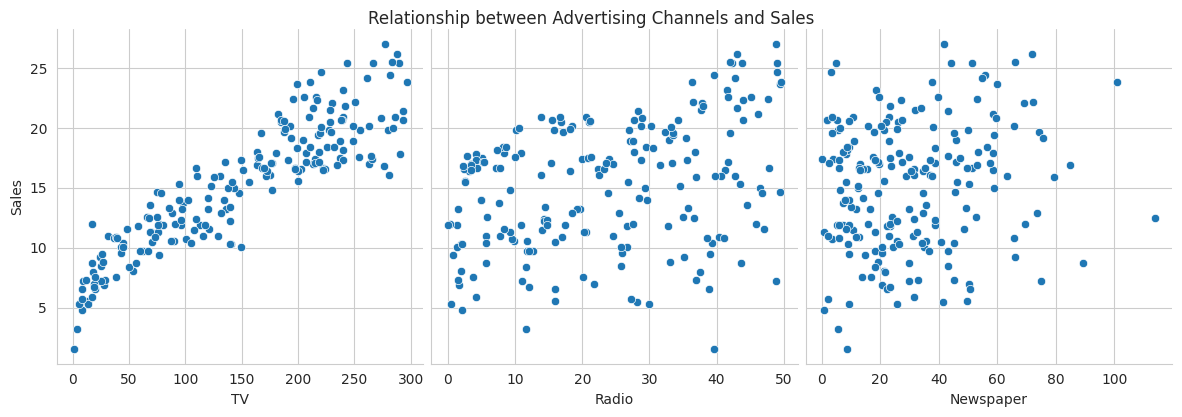

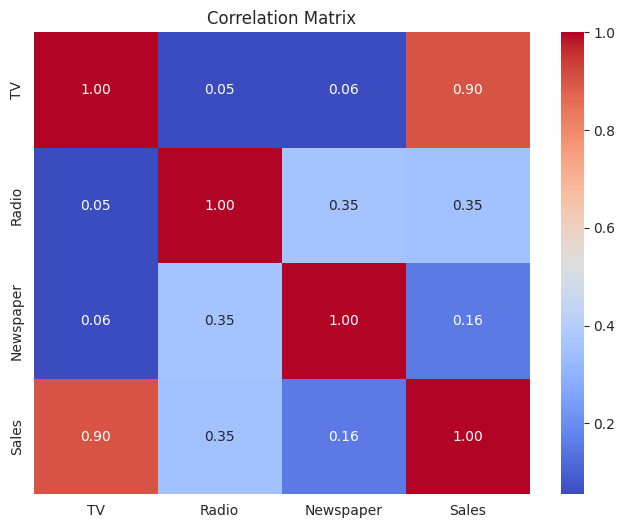

      TV  Radio  Newspaper  Sales  Total_Advertising
0  230.1   37.8       69.2   22.1              337.1
1   44.5   39.3       45.1   10.4              128.9
2   17.2   45.9       69.3   12.0              132.4
3  151.5   41.3       58.5   16.5              251.3
4  180.8   10.8       58.4   17.9              250.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sales_data = pd.read_csv('/content/drive/MyDrive/advertising.csv', encoding='latin1', sep=',', engine='python')

sales_data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

print(sales_data.head())

print(sales_data.describe())

print(sales_data.isnull().sum())

plt.figure(figsize=(8, 6))
sns.histplot(sales_data['Sales'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.pairplot(sales_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter', height=4)
plt.suptitle('Relationship between Advertising Channels and Sales', y=1.02)
plt.show()

correlation_matrix = sales_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

sales_data['Total_Advertising'] = sales_data['TV'] + sales_data['Radio'] + sales_data['Newspaper']

print(sales_data.head())


***Data Preprocessing***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = sales_data.drop('Sales', axis=1)
y = sales_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (160, 4)
Shape of X_test: (40, 4)
Shape of y_train: (160,)
Shape of y_test: (40,)


***Model Selection***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

linear_reg.fit(X_train_scaled, y_train)
random_forest_reg.fit(X_train_scaled, y_train)
gradient_boosting_reg.fit(X_train_scaled, y_train)

linear_reg_preds = linear_reg.predict(X_test_scaled)
random_forest_preds = random_forest_reg.predict(X_test_scaled)
gradient_boosting_preds = gradient_boosting_reg.predict(X_test_scaled)

linear_reg_rmse = mean_squared_error(y_test, linear_reg_preds, squared=False)
random_forest_rmse = mean_squared_error(y_test, random_forest_preds, squared=False)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_preds, squared=False)

print("Linear Regression RMSE:", linear_reg_rmse)
print("Random Forest RMSE:", random_forest_rmse)
print("Gradient Boosting RMSE:", gradient_boosting_rmse)


Linear Regression RMSE: 1.7052146229349232
Random Forest RMSE: 1.6985926527569817
Gradient Boosting RMSE: 1.4963764043856624


***Model Training and Evaluation***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 1.7052146229349232


***Hyperparameter Tuning***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_best = best_rf_model.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print("Root Mean Squared Error (Best Model):", rmse_best)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error (Best Model): 1.6591096222402713


***Final Model Selection***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

final_model = GradientBoostingRegressor(max_depth=10, min_samples_split=2, n_estimators=300, random_state=42)

final_model.fit(X_train, y_train)



GradientBoostingRegressor(max_depth=10, n_estimators=300, random_state=42)

***Sales Prediction***

Mounted at /content/drive
Enter TV advertising budget: 44.5
Enter radio advertising budget: 54.7
Enter newspaper advertising budget: 29.08


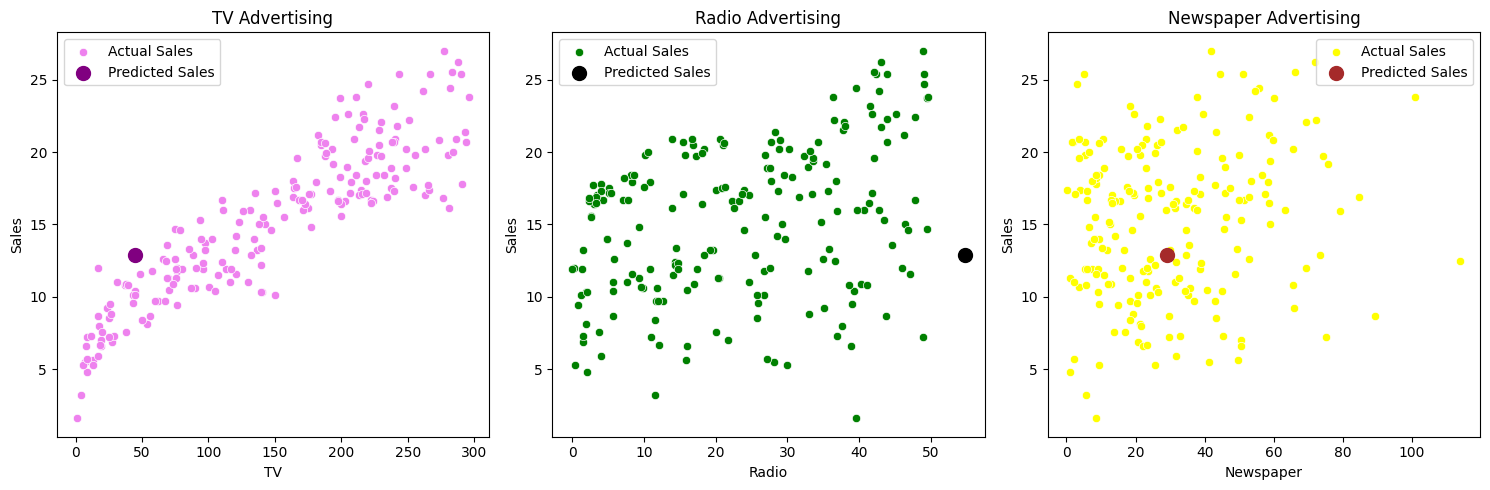

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

file_path = '/content/drive/MyDrive/advertising.csv'
sales_data = pd.read_csv(file_path, encoding='latin1', sep=',', engine='python')
sales_data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
sales_data.dropna(inplace=True)

def visualize_sales_prediction(tv_budget, radio_budget, newspaper_budget):

    user_input = pd.DataFrame({'TV': [tv_budget], 'Radio': [radio_budget], 'Newspaper': [newspaper_budget]})

    X = sales_data[['TV', 'Radio', 'Newspaper']]
    y = sales_data['Sales']
    model = LinearRegression()
    model.fit(X, y)


    predicted_sales = model.predict(user_input)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x='TV', y='Sales', data=sales_data, color='violet', label='Actual Sales')
    plt.scatter(tv_budget, predicted_sales, color='purple', label='Predicted Sales', s=100)
    plt.title('TV Advertising')
    plt.xlabel('TV')
    plt.ylabel('Sales')
    plt.legend()

    plt.subplot(1, 3, 2)
    sns.scatterplot(x='Radio', y='Sales', data=sales_data, color='green', label='Actual Sales')
    plt.scatter(radio_budget, predicted_sales, color='black', label='Predicted Sales', s=100)
    plt.title('Radio Advertising')
    plt.xlabel('Radio')
    plt.ylabel('Sales')
    plt.legend()

    plt.subplot(1, 3, 3)
    sns.scatterplot(x='Newspaper', y='Sales', data=sales_data, color='yellow', label='Actual Sales')
    plt.scatter(newspaper_budget, predicted_sales, color='brown', label='Predicted Sales', s=100)
    plt.title('Newspaper Advertising')
    plt.xlabel('Newspaper')
    plt.ylabel('Sales')
    plt.legend()

    plt.tight_layout()
    plt.show()

tv_budget = float(input("Enter TV advertising budget: "))
radio_budget = float(input("Enter radio advertising budget: "))
newspaper_budget = float(input("Enter newspaper advertising budget: "))

visualize_sales_prediction(tv_budget, radio_budget, newspaper_budget)
